In [2]:
!pip install ultralytics roboflow

!pip install "numpy<2.0" --force-reinstall

  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
mkl-umath 0.1.1 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.2.6 which is incompatible.
mkl-random 1.2.4 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.2.6 which is incompatible.
mkl-fft 1.3.8 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
datase

In [ ]:
# Notebook ke top-right mein "Restart" button dabao
# Ya ye code run karo:
import os
os._exit(00)

In [1]:
from ultralytics import YOLO
from roboflow import Roboflow
import torch

print(f"Ultralytics installed: {YOLO}")
print(f"CUDA available: {torch.cuda.is_available()}")

Ultralytics installed: <class 'ultralytics.models.yolo.model.YOLO'>
CUDA available: True


In [2]:
from roboflow import Roboflow

rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("YOUR_WORKSPACE").project("YOUR_PROJECT")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [3]:
from ultralytics import YOLO

# Model train karo
model = YOLO('yolov8s.pt')

results = model.train(
    data='Helmet-Detection-3/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name='helmet_detection2',
    patience=10,
    save=True,
    plots=True
)

Ultralytics 8.3.235 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Helmet-Detection-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=helmet_detection23, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=

In [4]:
# Best model load karo
from ultralytics import YOLO

best_model = YOLO('/kaggle/working/runs/detect/helmet_detection23/weights/best.pt')

# Validation metrics
metrics = best_model.val()
print(f"Final mAP50: {metrics.box.map50}")
print(f"Final mAP50-95: {metrics.box.map}")

# Test predictions
results = best_model.predict(
    source='Helmet-Detection-3/test/images',
    save=True,
    conf=0.25
)

Ultralytics 8.3.235 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1382.7±622.2 MB/s, size: 62.1 KB)
val: Scanning /kaggle/working/Helmet-Detection-3/valid/labels.cache... 1276 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1276/1276 2.4Mit/s 0.0s0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 80/80 4.5it/s 17.7s0.2s
                   all       1276       2520      0.936      0.896      0.948      0.729
                Helmet        835       1449      0.965      0.959      0.981      0.799
             No Helmet        583       1071      0.907      0.833      0.916       0.66
Speed: 0.9ms preprocess, 9.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /kaggle/working/runs/detect/val
Final mAP50: 0.9483913799359143
Final mAP50-95: 0.7293476609916929


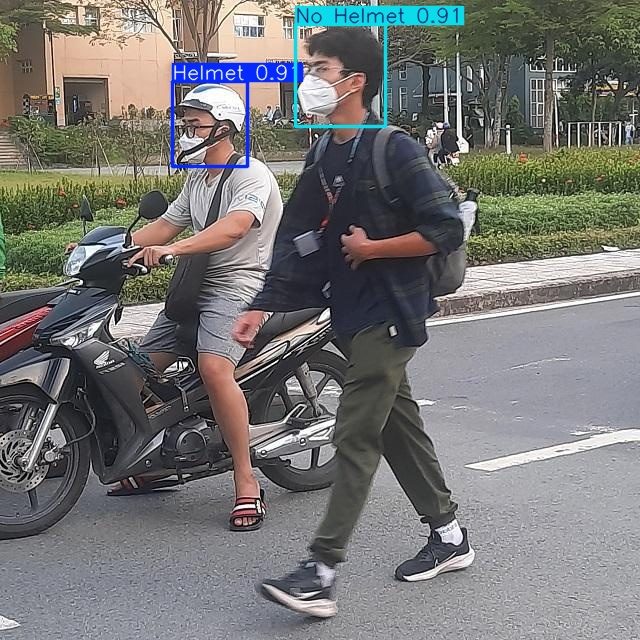

In [8]:
from IPython.display import Image, display

display(Image(filename='/kaggle/working/runs/detect/predict/val67_jpg.rf.4d4c67b3b7401a9435a32cae6a8d4254.jpg'))